In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import joblib


In [3]:
data = pd.read_csv('Housing.csv')

features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement',
            'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']
X = data[features]
y = data['price']

In [4]:
print(X.isnull().sum())

area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


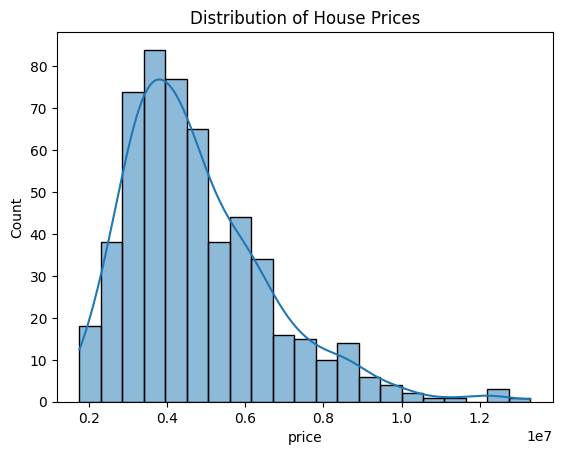

In [5]:
sns.histplot(y, kde=True)
plt.title('Distribution of House Prices')
plt.show()

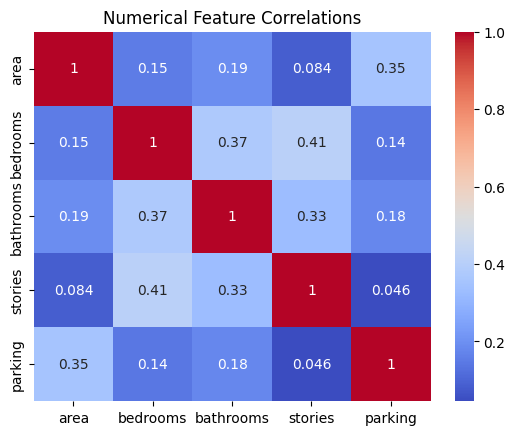

In [6]:
numericCols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
sns.heatmap(X[numericCols].corr(), annot=True, cmap='coolwarm')
plt.title('Numerical Feature Correlations')
plt.show()

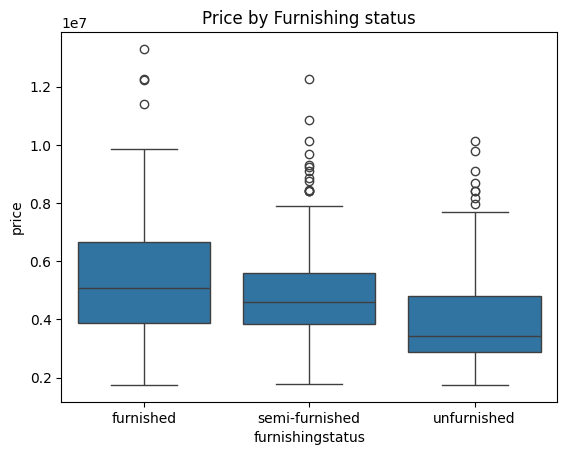

In [7]:
sns.boxplot(x='furnishingstatus', y=y, data=data)
plt.title('Price by Furnishing status')
plt.show()

### **Preprocessing and Training**

In [8]:
categoryCols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
                    'prefarea', 'furnishingstatus']

In [9]:
numericTransformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categoryTransformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers = [
        ('num', numericTransformer, numericCols),
        ('cat', categoryTransformer, categoryCols)
    ]
)

In [10]:
model = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor ', LinearRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['area', 'bedrooms',
                                                   'bathrooms', 'stories',
                                                   'parking']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['mainroad', 'guestroom',
                                                   'basement',
                                                   'hotwaterheating',
                                                   'airconditioning',
                                                   'prefarea',
                                                   'furnishingstatus'])])),
                ('regressor ', LinearRegression())])

In [12]:
y_predicted = model.predict(X_test)
rootMeanSquareError = np.sqrt(mean_squared_error(y_test, y_predicted))
r2 = r2_score(y_test, y_predicted)

print(f"Root Mean Squared Error: {rootMeanSquareError:.2f}")
print(f"R² Score: {r2:.2f}")

Root Mean Squared Error: 1324506.96
R² Score: 0.65


In [16]:
joblib.dump(model, 'housePriceLinearModel.pkl')
joblib.dump(r2, 'R2_Score.pkl')

['R2_Score.pkl']